This notebook file evaluates the performance of ULA applying different metrics: Kullback-Leibler (KL) divergence and 2-Wasserstein distance, following the section 2.3 in the paper. Specifically,

- The **'Task 1'** evaluates the change of values of the performance metrics as a function of different stepsizes $\gamma$, between a special target distribution $p^\star$ and the stationary distribution $q$ generated by ULA. This is explained in details in section 2.3.1 in the paper.

- The **'Task 2'** evaluates the rate of convergence of ULA, by plotting the change of 2-Wasserstein distance as a function of different stepsizes $\gamma$, between the distribution of ULA chain at each time and the target distribution $p^\star$. We also add the value of the 2-Wasserstein distance between the target distribution $p^\star$ and the stationary distribution $q$ generated by ULA, as the comparison for showing the convergence behaviour. These are in section 2.3.3 of the paper.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1

In [2]:
def stationary_var_ULA(sigma, gam):
    """Return the variance of stationary distribution generated by ULA.

    Args:
        sigma (float): standard deviation of the target distribution p_star.
        gam (np.array): stepsize selected.
        
    Return:
        float: the variance of stationary distribution of ULA.
    """
    
    return (2 * sigma**4) / (2 * sigma**2 - gam)

In [3]:
def KL_divergence(var_p, var_q):
    """Calculate the KL divergence for 1D normal distributions with the same mean.

    Args:
        var_p (float): the variance of the target distribution, p_star.
        var_q (float): the variance of the investigated distribution.

    Returns:
        float: the KL divergence between to distributions, to measure their differences.
    """
    
    return 1/2 * (np.log(var_q / var_p) + var_p / var_q - 1)
    
    
def W2(var_p, var_q):
    """Calculate the 2-Wasserstein distance for 1D normal distribution, with the same mean.

    Args:
        var_p (float): the variance of the target distribution, p_star.
        var_q (float): the variance of the investigated distribution.

    Returns:
        float: the 2-Wasserstein distance between to distributions, to measure their differences.
    """
    return (np.sqrt(var_p) - np.sqrt(var_q))**2

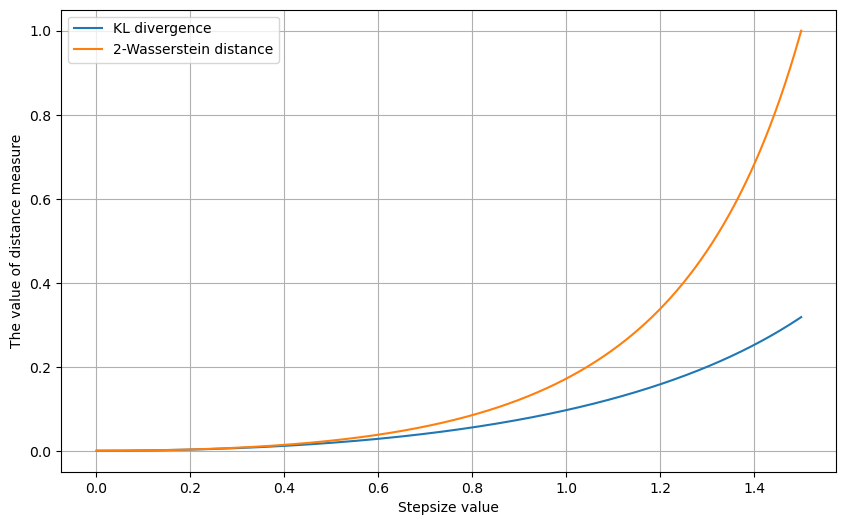

In [4]:
gam_range = np.linspace(0.001, 1.5, 1000)  # Define the stepsize range used for plot
var_q = stationary_var_ULA(1, gam_range)  # calculate the stationary variance, with target variance be 1

plt.figure(figsize=(10,6))

plt.plot(gam_range, KL_divergence(1, var_q), label = 'KL divergence')
plt.plot(gam_range, W2(1, var_q), label = '2-Wasserstein distance')
plt.xlabel('Stepsize value')
plt.ylabel('The value of distance measure')

plt.grid()
plt.legend()
plt.show()

In [5]:
var_q = stationary_var_ULA(1, 0.001)

print(KL_divergence(1, var_q))
print(W2(1, var_q))

6.252084117086554e-08
6.254690333612904e-08


## Task 2

Distribution at each time deduction.

In [6]:
def calculate_a(var_p, gam):
    """Return the substitution value of a.

    Args:
        var_p (np.float): the variance of target distribution p_star.
        gam (np.array): stepsize taken.
    """
    return 1 - gam / var_p


def calculate_b(gam, mu, var_p):
    """Return the substitution value of b.

    Args:
        gam (np.array): stepsize taken.
        mu (np.float): mean of the target distribution.
        var_p (np.float): variance of the target distribution.
    """
    return gam * mu / var_p

In [7]:
def mean_qt(a, b, t, x0 = 0):
    """Return the mean of the distribution by ULA at time t.

    Args:
        a (np.array): substituted value a by using calculate_a.
        b (np.array): substituted value b by using calculate_b.
        t (np.array): (discrete) time.
        x0 (int, optional): initial sample value taken to start ULA. Defaults to 0.
    """
    
    mean_qt_list = []  # initialise
    for time in t:
        sum_a = 0
        for i in range(time):
            sum_a += a ** i
        mean_qt_list.append((a**time) * x0 + b * sum_a)

    return mean_qt_list


def var_qt(gam, t, a):
    """Return the variance, as a list, of the distribution by ULA at time t.

    Args:
        gam (np.array): stepsize taken.
        t (np.array): (discrete) time.
        a (np.array): substituted value a by using calculate_a.
    """
    var_qt_list = []  # initialise
    
    for time in t:
        sum_a2 = 0
        for i in range(time):
            sum_a2 += a**(2 * i)
        var_qt_list.append(2 * gam * sum_a2)
        
    return var_qt_list

We need to write our new function for calculating the 2-Wasserstein distance, for this distribution varying with time.

In [8]:
def W2_time(var_p, var_qt, mu, mean_qt):
    mean_term_list = [(mu - a)**2 for a in mean_qt]
    var_term_list = [(np.sqrt(var_p) - np.sqrt(b))**2 for b in var_qt]
    return [mean_diff_square + sig_diff_square 
            for mean_diff_square, sig_diff_square in zip(mean_term_list, var_term_list)]

Test.

In [9]:
a = calculate_a(var_p = 1, gam = 0.2)
b = calculate_b(gam = 0.2, mu = 1, var_p = 1)
time = np.arange(1, 11, 1)

print(a)
print(b)
print(var_qt(0.2, time, a))
print(mean_qt(a, b, time, x0 = 1))

W2_time(1, var_qt(0.2, time, a), 1, mean_qt(a, b, time, x0=1))

0.8
0.2
[0.4, 0.6560000000000001, 0.8198400000000001, 0.9246976000000002, 0.9918064640000003, 1.0347561369600002, 1.0622439276544005, 1.0798361136988164, 1.0910951127672426, 1.0983008721710354]
[1.0, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000002, 1.0000000000000004, 1.0000000000000002, 1.0000000000000004]


[0.13508893593264826,
 0.03612346149467302,
 0.008939671434123348,
 0.0014736400826948848,
 1.6852620324186343e-05,
 0.00029686043466242343,
 0.0009395564812343336,
 0.0015328502660551069,
 0.001985146521097294,
 0.0023038567427830403]

**Mean of the target distribution $\mu$ cannot be same as the starting point $x_0$? Otherwise the first term = 0 disappears!**

First try the stepsize 0.02.

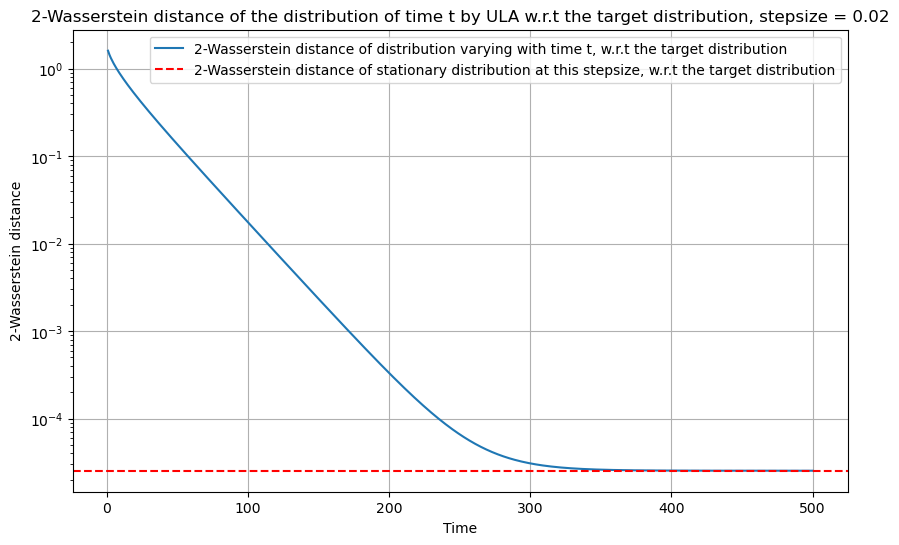

In [10]:
a = calculate_a(1, 0.02)
b = calculate_b(0.02, 0, 1)  # setting mu = 0
stationary_var = stationary_var_ULA(1, 0.02)

time = np.arange(1, 501, 1)

plt.figure(figsize=(10,6))

plt.plot(time, W2_time(1, var_qt(0.02, time, a), 0, mean_qt(a, b, time, x0=1)), 
         label = '2-Wasserstein distance of distribution varying with time t, w.r.t the target distribution')
plt.axhline(y=W2(1, stationary_var), color='red', linestyle='--', 
            label='2-Wasserstein distance of stationary distribution at this stepsize, w.r.t the target distribution')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('2-Wasserstein distance')
plt.title('2-Wasserstein distance of the distribution of time t by ULA w.r.t the target distribution, stepsize = 0.02')

plt.grid()
plt.legend()
plt.show()

In [11]:
W2(1, stationary_var)

2.537958258595025e-05

Stepsize 0.2 case.

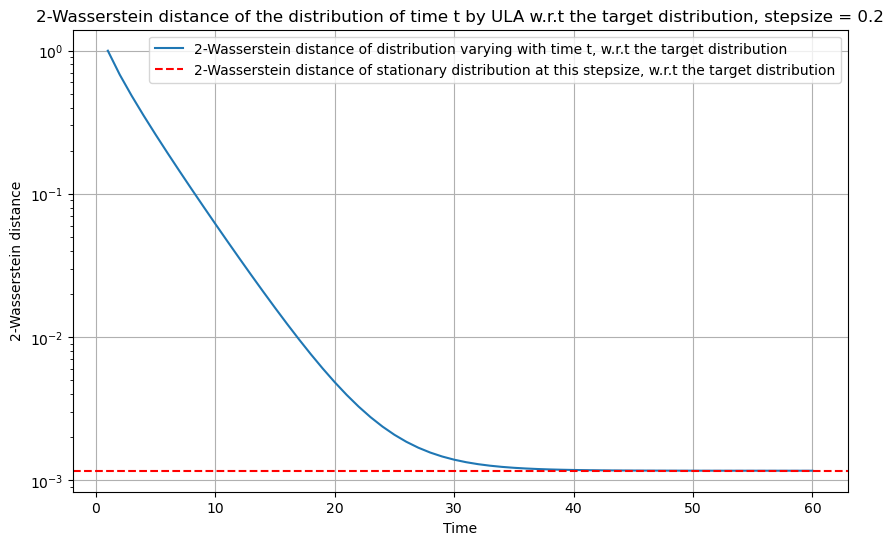

In [17]:
a = calculate_a(var_p = 1, gam = 0.13)
b = calculate_b(gam = 0.13, mu = 0, var_p = 1)
stationary_var = stationary_var_ULA(1, 0.13)

time = np.arange(1, 61, 1)

plt.figure(figsize=(10,6))

plt.plot(time, W2_time(var_p = 1, var_qt = var_qt(0.13, time, a), mu = 0, mean_qt = mean_qt(a, b, time, x0=1)), 
         label = '2-Wasserstein distance of distribution varying with time t, w.r.t the target distribution')
plt.axhline(y=W2(1, stationary_var), color='red', linestyle='--', 
            label='2-Wasserstein distance of stationary distribution at this stepsize, w.r.t the target distribution')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('2-Wasserstein distance')
plt.title('2-Wasserstein distance of the distribution of time t by ULA w.r.t the target distribution, stepsize = 0.2')

plt.grid()
plt.legend()
plt.show()

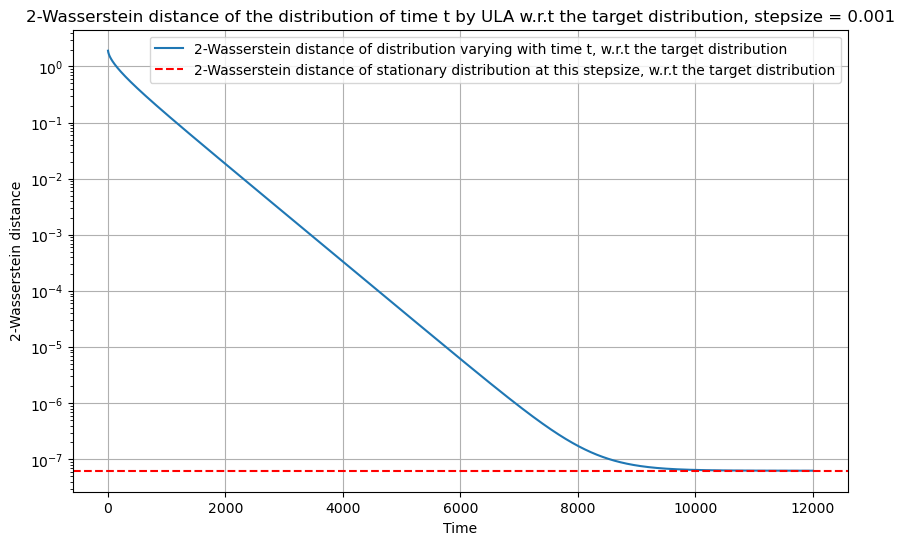

In [18]:
a = calculate_a(1, 0.001)
b = calculate_b(0.0001, 0, 1)  # setting mu = 0
stationary_var = stationary_var_ULA(1, 0.001)

time = np.arange(1, 12001, 1)

plt.figure(figsize=(10,6))

plt.plot(time, W2_time(1, var_qt(0.001, time, a), 0, mean_qt(a, b, time, x0=1)), 
         label = '2-Wasserstein distance of distribution varying with time t, w.r.t the target distribution')
plt.axhline(y=W2(1, stationary_var), color='red', linestyle='--', 
            label='2-Wasserstein distance of stationary distribution at this stepsize, w.r.t the target distribution')

# Set y-axis to log scale
plt.yscale('log')

plt.xlabel('Time')
plt.ylabel('2-Wasserstein distance')
plt.title('2-Wasserstein distance of the distribution of time t by ULA w.r.t the target distribution, stepsize = 0.001')

plt.grid()
plt.legend()
plt.show()